# Python visualization Basics

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

### Import dataset
(https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/Visualization/Online_Retail/Online_Retail.csv). 

In [3]:
online_rt=pd.read_csv('Online_Retail.csv',encoding="ISO-8859-1")
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Creating a histogram to compare quantity for all countries excep UK

In [4]:
s=online_rt[online_rt.Country!='United Kingdom'].groupby('Country')['Quantity'].sum().sort_values(ascending=False)[:10]

In [5]:
s

Country
Netherlands    200128
EIRE           142637
Germany        117448
France         110480
Australia       83653
Sweden          35637
Switzerland     30325
Spain           26824
Japan           25218
Belgium         23152
Name: Quantity, dtype: int64

(array([200128., 142637., 117448., 110480.,  83653.,  35637.,  30325.,
         26824.,  25218.,  23152.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

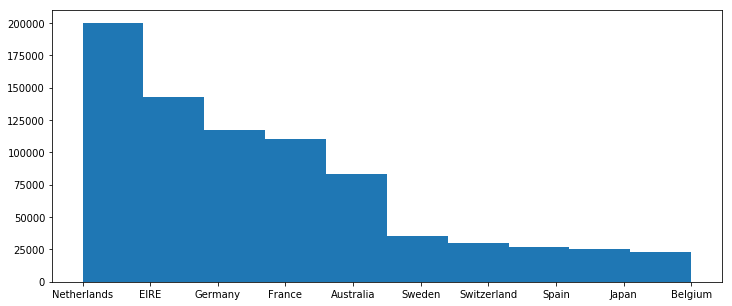

In [7]:
plt.figure(figsize=(12,5))
plt.hist(weights=s.values,x=list(s.index.values))

### deleting -ve entries from quantity

In [8]:
online_rt[online_rt.Quantity>0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Creating a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries

In [9]:
ser=online_rt.groupby('Country')['Quantity'].sum().sort_values(ascending=False)[:3].reset_index()

In [10]:
c=pd.Series(ser.Country)
c

0    United Kingdom
1       Netherlands
2              EIRE
Name: Country, dtype: object

In [11]:
c=online_rt[(online_rt['Country']==c[2]) | (online_rt['Country']==c[1])| (online_rt['Country']==c[0])].groupby(['Country','CustomerID']).sum().reset_index()

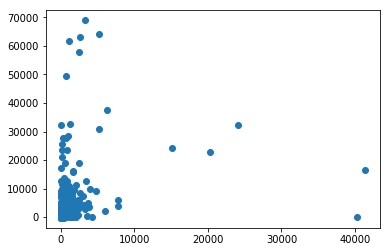

In [12]:
a=c[c['Country']=='United Kingdom']
plt.scatter(x=a.UnitPrice,y=a.Quantity)

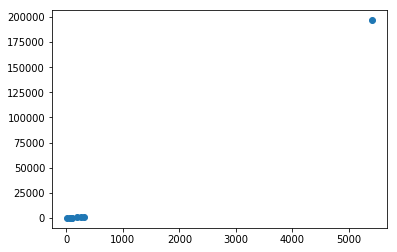

In [13]:
a=c[c['Country']=='Netherlands']
plt.scatter(x=a.UnitPrice,y=a.Quantity)

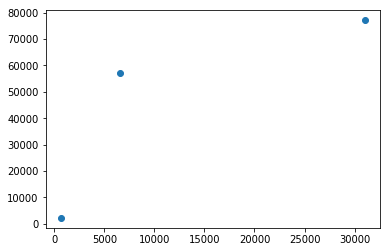

In [14]:
a=c[c['Country']=='EIRE']
plt.scatter(x=a.UnitPrice,y=a.Quantity)